In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings("ignore")

# Basic
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import random
from tqdm.autonotebook import tqdm
import string
from collections import Counter
import re

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

%matplotlib inline
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 100) 

In [2]:
df = pd.read_excel("Case Prediction Data2.xlsx")

In [3]:
df

Case Number                                            Subject  \
0            204977                                   Efile Acceptance   
1            204979  Oregon STAT help: Previous Case 203787 Client ...   
2            204980             Data map incorrectly pulling in values   
3            204981  The New Corptax Connect Website is not properl...   
4            204986     LD400 is not reflecting a temporary adjustment   
...             ...                                                ...   
189183       518074  Possible Wrong Calculation for LA Plaquemines ...   
189184       518075  Sch. L and M-2 not populating in Short Period ...   
189185       518076                 Legacy Form 8992 GILTI Calculation   
189186       518077                VA Efile Diagnostics - not due 8/15   
189187       518078                          Request Login Credentials   

              Date Created         Date Closed  Origin Priority  \
0      2017-01-02 05:39:00 2017-01-03 09:03:00     Web   Medium   
1      2017-01-02 09:03:00 2017-01-04 16:56:00     Web     High   
2      2017-01-02 11:25:00 2017-01-03 15:48:00     Web   Medium   
3      2017-01-02 12:06:00 2017-01-03 09:26:00     Web     High   
4      2017-01-03 07:17:00 2017-01-05 08:21:00  E-mail   Medium   
...                    ...                 ...     ...      ...   
189183 2022-08-15 20:04:00 2022-08-16 16:27:00  E-mail   Medium   
189184 2022-08-15 20:05:00 2022-08-16 17:37:00     Web   Medium   
189185 2022-08-15 20:22:00 2022-08-16 13:57:00     Web     High   
189186 2022-08-15 20:45:00 2022-08-17 17:32:00     Web   Medium   
189187 2022-08-15 22:37:00 2022-08-16 03:44:00     Web      Low   

                   Team          Case Type       SLA  \
0       Tax Preparation              Efile  Platinum   
1       Tax Preparation  Question / How To    Silver   
2       Tax Preparation  Question / How To    Silver   
3       Tax Preparation    Problem / Error    Silver   
4       Tax Preparation    Problem / Error  Platinum   
...                 ...                ...       ...   
189183  Tax Preparation    Problem / Error    Silver   
189184  Tax Preparation  Question / How To  Platinum   
189185  Tax Preparation  Question / How To    Silver   
189186  Tax Preparation              Efile    Silver   
189187  Tax Preparation  Question / How To  Platinum   

                                        Problem Statement  \
0       We transmitted a Michigan return still have no...   
1       Oregon STAT help: Previous Case 203787 Client ...   
2       Corptax Office Import - Credit Account imports...   
3       Searches can't be performed on the new system....   
4          LD400 is not reflecting a temporary adjustment   
...                                                   ...   
189183  In Column B, the total tax due is 12,229.24 (l...   
189184                      Sch. L and M-2 not populating   
189185                           Form 8992 US shareholder   
189186  System will not recognize other subtractions a...   
189187                          Request Login Credentials   

                      Product                               Product Area  \
0                  Compliance                          Returns / Reports   
1                   Provision                                      State   
2       Office - Excel Add-In                            Import / Export   
3                    Websites  Connections (https://connect.corptax.com)   
4                  Compliance                          Returns / Reports   
...                       ...                                        ...   
189183              Sales Tax                          Returns / Reports   
189184             Compliance                          Returns / Reports   
189185             Compliance                          Returns / Reports   
189186             Compliance                          Returns / Reports   
189187               Websites  Connections (https://connect.corptax.com)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189188 entries, 0 to 189187
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Case Number        189188 non-null  int64         
 1   Subject            189187 non-null  object        
 2   Date Created       189188 non-null  datetime64[ns]
 3   Date Closed        189142 non-null  datetime64[ns]
 4   Origin             189188 non-null  object        
 5   Priority           189188 non-null  object        
 6   Team               189186 non-null  object        
 7   Case Type          185597 non-null  object        
 8   SLA                189149 non-null  object        
 9   Problem Statement  185687 non-null  object        
 10  Product            189064 non-null  object        
 11  Product Area       188973 non-null  object        
 12  Product Category   47138 non-null   object        
 13  Product Type       5082 non-null    object  

### Total Time to resolve the issue

In [5]:
df['Date Created'] = df['Date Created'].dt.date
df['Date Closed'] = df['Date Closed'].dt.date

In [6]:
df["total_time"] = df["Date Closed"] - df["Date Created"]

In [7]:
df["total_time"].value_counts()[:15]

0 days     96930
1 days     39827
2 days     11067
3 days      9424
4 days      6200
5 days      4797
6 days      4283
7 days      3653
8 days      2070
9 days      1107
10 days      857
13 days      803
11 days      800
14 days      712
12 days      698
Name: total_time, dtype: int64

In [8]:
df["total_time"].value_counts()[-15:]

275 days    1
555 days    1
657 days    1
276 days    1
202 days    1
374 days    1
433 days    1
326 days    1
292 days    1
575 days    1
581 days    1
565 days    1
709 days    1
317 days    1
371 days    1
Name: total_time, dtype: int64

- Insights: Most of the tasks were resolved quickly but few tasks took almost year to complete

In [9]:
df.isnull().sum()

Case Number               0
Subject                   1
Date Created              0
Date Closed              46
Origin                    0
Priority                  0
Team                      2
Case Type              3591
SLA                      39
Problem Statement      3501
Product                 124
Product Area            215
Product Category     142050
Product Type         184106
Jurisdiction          67102
Resolution             3070
KB #                 137297
KB Title             139335
total_time               46
dtype: int64

In [10]:
missing_values = df.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

- Insight: Product Category, Product Type, KB# and KB Title has the missing value of more than 60%

In [11]:
len(df.Subject.value_counts())

157484

In [12]:
typecounts = df.Origin.value_counts().to_dict()
df1 = pd.DataFrame(list(typecounts.items()), columns=['Origin', 'Counts'])

fig = px.pie(df1, values='Counts', names='Origin',
             title='Origin',labels='Origin')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Insights: Most of the origin of the problem is related to Web

In [13]:
typecounts = df["Case Type"].value_counts().to_dict()
df1 = pd.DataFrame(list(typecounts.items()), columns=['Case_type', 'Counts'])

fig = px.pie(df1, values='Counts', names='Case_type',
             title='Case Type',labels='Case_type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Insights: Most of the problems are regarding "How to solve it"

In [14]:
typecounts = df["SLA"].value_counts().to_dict()
df1 = pd.DataFrame(list(typecounts.items()), columns=['SLA', 'Counts'])

fig = px.pie(df1, values='Counts', names='SLA',
             title='SLA',labels='SLA')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [15]:
typecounts = df["Product"].value_counts().to_dict()
df1 = pd.DataFrame(list(typecounts.items()), columns=['Product', 'Counts'])

fig = px.pie(df1, values='Counts', names='Product',
             title='Product',labels='Product')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [17]:
typecounts = df["Priority"].value_counts().to_dict()
df1 = pd.DataFrame(list(typecounts.items()), columns=['Priority', 'Counts'])

fig = px.pie(df1, values='Counts', names='Priority',
             title='Priority',labels='Priority')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [18]:
typecounts = df["Product"].value_counts()
typecounts = pd.DataFrame(typecounts).reset_index()
fig = px.bar(typecounts, 
             x="index", 
             y="Product",  
             title="Frequency of Product",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

In [19]:
typecounts = df["Team"].value_counts()
typecounts = pd.DataFrame(typecounts).reset_index()
fig = px.bar(typecounts, 
             x="index", 
             y="Team",  
             title="Frequency of Resolution",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

In [20]:
typecounts = df["Product Area"].value_counts()
typecounts = pd.DataFrame(typecounts).reset_index()
fig = px.bar(typecounts, 
             x="index", 
             y="Product Area",  
             title="Frequency of Product Area",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

In [21]:
typecounts = df["Resolution"].value_counts()
typecounts = pd.DataFrame(typecounts).reset_index()
fig = px.bar(typecounts, 
             x="index", 
             y="Resolution",  
             title="Frequency of Resolution",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

# Text Preprocessing

In [22]:
df1 = df[["Problem Statement","Subject"]]
df1

Problem Statement  \
0       We transmitted a Michigan return still have no...   
1       Oregon STAT help: Previous Case 203787 Client ...   
2       Corptax Office Import - Credit Account imports...   
3       Searches can't be performed on the new system....   
4          LD400 is not reflecting a temporary adjustment   
...                                                   ...   
189183  In Column B, the total tax due is 12,229.24 (l...   
189184                      Sch. L and M-2 not populating   
189185                           Form 8992 US shareholder   
189186  System will not recognize other subtractions a...   
189187                          Request Login Credentials   

                                                  Subject  
0                                        Efile Acceptance  
1       Oregon STAT help: Previous Case 203787 Client ...  
2                  Data map incorrectly pulling in values  
3       The New Corptax Connect Website is not properl...  
4          LD400 is not reflecting a temporary adjustment  
...                                                   ...  
189183  Possible Wrong Calculation for LA Plaquemines ...  
189184  Sch. L and M-2 not populating in Short Period ...  
189185                 Legacy Form 8992 GILTI Calculation  
189186                VA Efile Diagnostics - not due 8/15  
189187                          Request Login Credentials  

[189188 rows x 2 columns]

In [33]:
df1.isnull().sum()

Problem Statement    3501
Subject                 1
dtype: int64

In [34]:
df1.shape

(189188, 2)

In [35]:
df1 = df1.dropna(axis=0)
df1.shape

(185687, 2)

In [45]:
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words("english"))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop_words]
    # 6. lemmatize
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmas))

In [46]:
%time df1['clean_statement'] = df1["Problem Statement"].apply(review_to_words)

Wall time: 15.6 s


In [47]:
%time df1['clean_subject'] = df1["Subject"].apply(review_to_words)

Wall time: 13.2 s


In [48]:
df1

Problem Statement  \
0       We transmitted a Michigan return still have no...   
1       Oregon STAT help: Previous Case 203787 Client ...   
2       Corptax Office Import - Credit Account imports...   
3       Searches can't be performed on the new system....   
4          LD400 is not reflecting a temporary adjustment   
...                                                   ...   
189183  In Column B, the total tax due is 12,229.24 (l...   
189184                      Sch. L and M-2 not populating   
189185                           Form 8992 US shareholder   
189186  System will not recognize other subtractions a...   
189187                          Request Login Credentials   

                                                  Subject  \
0                                        Efile Acceptance   
1       Oregon STAT help: Previous Case 203787 Client ...   
2                  Data map incorrectly pulling in values   
3       The New Corptax Connect Website is not properl...   
4          LD400 is not reflecting a temporary adjustment   
...                                                   ...   
189183  Possible Wrong Calculation for LA Plaquemines ...   
189184  Sch. L and M-2 not populating in Short Period ...   
189185                 Legacy Form 8992 GILTI Calculation   
189186                VA Efile Diagnostics - not due 8/15   
189187                          Request Login Credentials   

                                          clean_statement  \
0       transmit michigan return still receive accepta...   
1       oregon stat help previous case client need hel...   
2       corptax office import credit account import po...   
3       search perform new system function properly si...   
4                         ld reflect temporary adjustment   
...                                                   ...   
189183  column b total tax due line discount tax due c...   
189184                                     sch l populate   
189185                                form us shareholder   
189186  system recognize subtractions create diagnosti...   
189187                          request login credentials   

                                            clean_subject  
0                                        efile acceptance  
1       oregon stat help previous case client need hel...  
2                         data map incorrectly pull value  
3               new corptax connect website properly work  
4                         ld reflect temporary adjustment  
...                                                   ...  
189183  possible wrong calculation la plaquemines pari...  
189184                 sch l populate short period return  
189185                      legacy form gilti calculation  
189186                           va efile diagnostics due  
189187                          request login credentials  

[185687 rows x 4 columns]

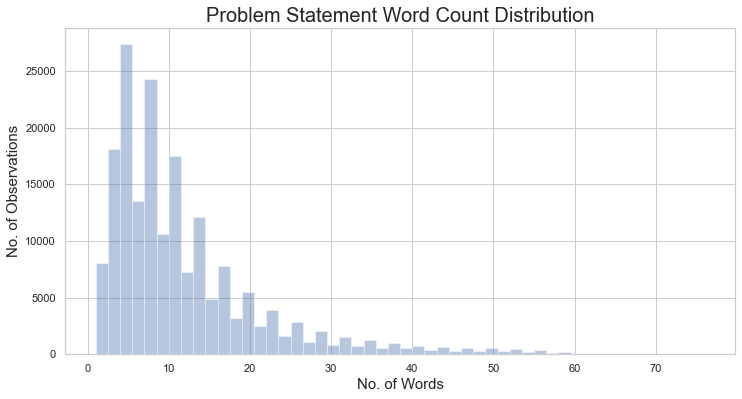

In [52]:
word_count = [len(x.split()) for x in df1['Problem Statement'].tolist()]
barplot_dim = (12, 6)
ax = plt.subplots(figsize =barplot_dim);
ax = sns.distplot(word_count, kde=False);
ax.set_ylabel('No. of Observations', size=15)
ax.set_xlabel('No. of Words', size=15)
ax.set_title('Problem Statement Word Count Distribution', size=20);

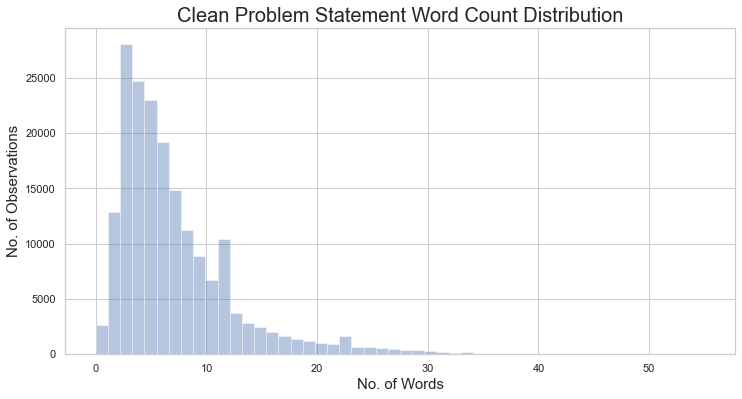

In [51]:
word_count = [len(x.split()) for x in df1['clean_statement'].tolist()]
barplot_dim = (12, 6)
ax = plt.subplots(figsize =barplot_dim);
ax = sns.distplot(word_count, kde=False);
ax.set_ylabel('No. of Observations', size=15)
ax.set_xlabel('No. of Words', size=15)
ax.set_title('Clean Problem Statement Word Count Distribution', size=20);

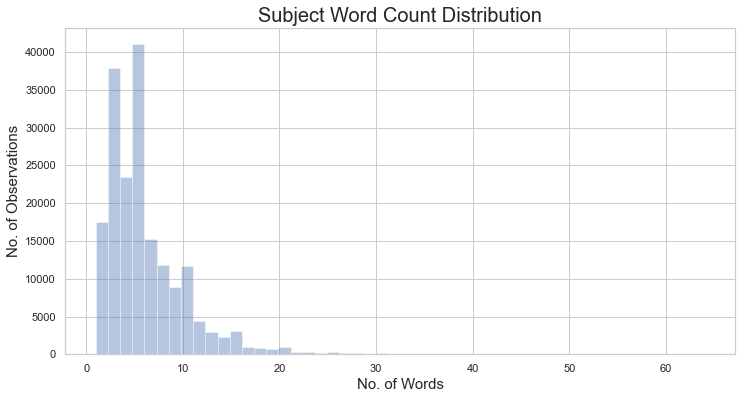

In [53]:
word_count = [len(x.split()) for x in df1['Subject'].tolist()]
barplot_dim = (12, 6)
ax = plt.subplots(figsize =barplot_dim);
ax = sns.distplot(word_count, kde=False);
ax.set_ylabel('No. of Observations', size=15)
ax.set_xlabel('No. of Words', size=15)
ax.set_title('Subject Word Count Distribution', size=20);

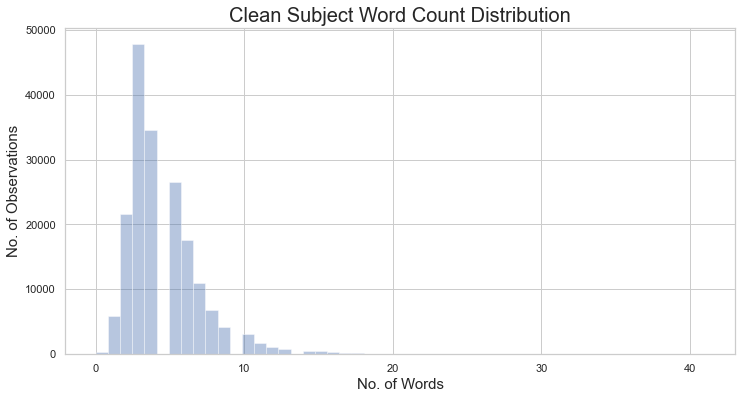

In [54]:
word_count = [len(x.split()) for x in df1['clean_subject'].tolist()]
barplot_dim = (12, 6)
ax = plt.subplots(figsize =barplot_dim);
ax = sns.distplot(word_count, kde=False);
ax.set_ylabel('No. of Observations', size=15)
ax.set_xlabel('No. of Words', size=15)
ax.set_title('Clean Subject Word Count Distribution', size=20);

## Most Frequent words in Problem Statement

In [55]:
temp_df = pd.DataFrame()
df1['temp_list'] = df1['clean_statement'].apply(lambda x :str(x).split())
top = Counter([item for sublist in df1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp.columns = ['Common Words', 'Count']
temp.style.background_gradient(cmap='Reds')

### Most Frequent words in Subject

In [56]:
temp_df = pd.DataFrame()
df1['temp_list'] = df1['clean_subject'].apply(lambda x :str(x).split())
top = Counter([item for sublist in df1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp.columns = ['Common Words', 'Count']
temp.style.background_gradient(cmap='Reds')

### Word Cloud of Problem Statement

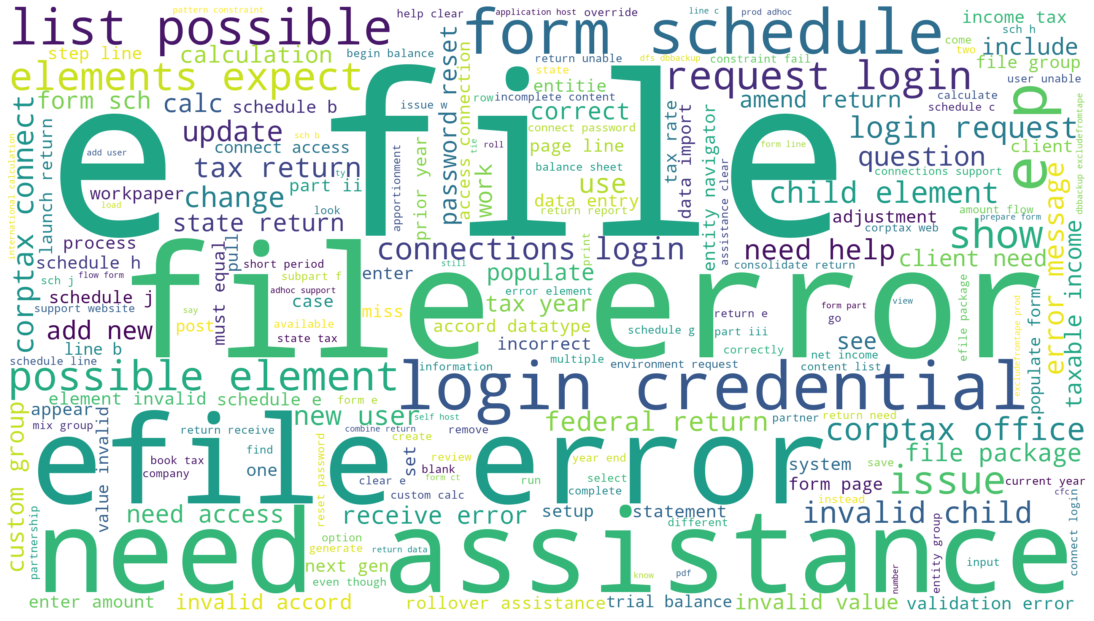

In [57]:
text = ' '.join(df1['clean_statement'])
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, width=2560, height=1440).generate(text)

barplot_dim = (15, 15)
ax = plt.subplots(figsize=barplot_dim, facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Word Cloud of Subject

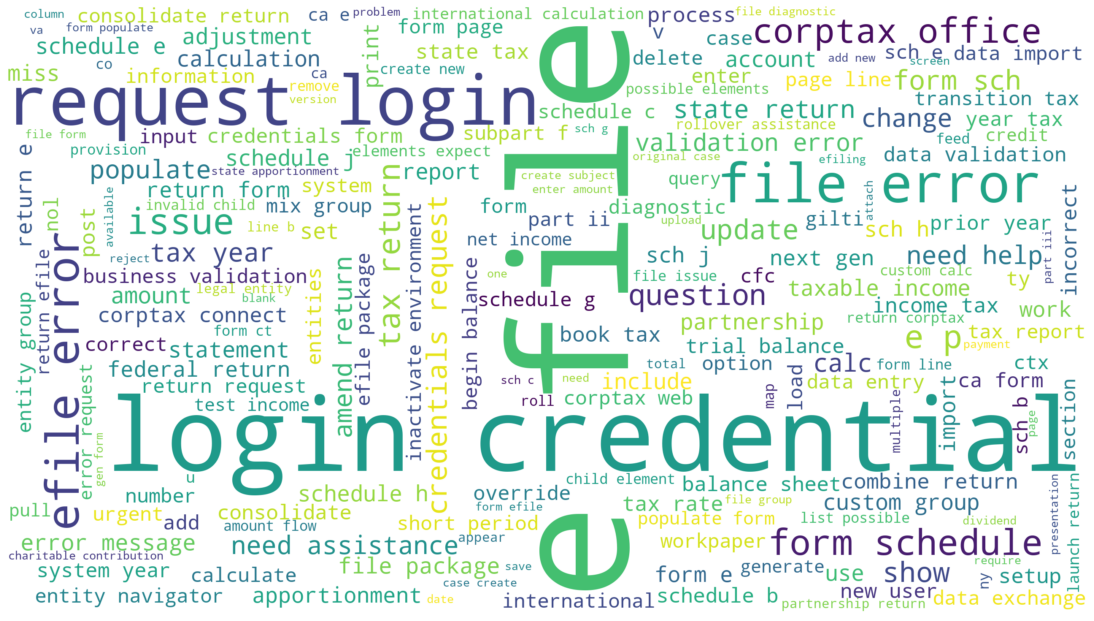

In [58]:
text = ' '.join(df1['clean_subject'])
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, width=2560, height=1440).generate(text)

barplot_dim = (15, 15)
ax = plt.subplots(figsize=barplot_dim, facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()